<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;">Identifying High Risk Patients for Hospital Readmission 

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#de6114;">Project Group 5 Team Members:
1) Anita H.
2) Shweta Chavan
3) Mrunal Dalvi
4) Aroop Ajaykumar
5) Rhushikesh Hanjankar

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##f08513;"> I) Problem Statement: 

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##f08513;">  Why hospital readmissions matter? 

In [1]:
#For data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
import scipy.stats as stats

# Performance Metric
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,matthews_corrcoef,roc_auc_score

from sklearn.model_selection import GridSearchCV,StratifiedKFold

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#%%time  # Returns the execution time of one cell. 
df = pd.read_csv('diabetic_data.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##f08513;"> II) Data Exploration

In [3]:
print('Number of Rows:{}, Number of columns:{}'.format(df.shape[0],df.shape[1]))
print('='*100)
print('\nDatatypes Count\n',df.get_dtype_counts())

Number of Rows:101766, Number of columns:50

Datatypes Count
 int64     13
object    37
dtype: int64


In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
#Dataset Summary:
#%%time
def fun_view():
    ''' This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.'''
    null_values = df.apply(lambda x:x.isnull().sum())
    blank_char = df.apply(lambda x:x.isin(['?']).sum())
    percent_blank_char = df.apply(lambda x:round((x.isin(['?']).sum()/df.shape[0])*100, 2))
    unique_values = df.apply(lambda x:len(x.unique()))
    return pd.DataFrame({'null_values':null_values,
                         '? Values':blank_char,'% ? Values':percent_blank_char
                        ,'unique_values':unique_values})

In [7]:
%%time
print('Function Information',fun_view.__doc__)
view = fun_view()
display(view)

Function Information  This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.


,null_values,? Values,% ? Values,unique_values
encounter_id,0,0,0.00,101766
patient_nbr,0,0,0.00,71518
race,0,2273,2.23,6
gender,0,0,0.00,3
age,0,0,0.00,10
weight,0,98569,96.86,10
admission_type_id,0,0,0.00,8
discharge_disposition_id,0,0,0.00,26
admission_source_id,0,0,0.00,17
time_in_hospital,0,0,0.00,14


Wall time: 2.26 s


In [8]:
# Overall null values in the dataset. 
view[view['% ? Values'] != 0]

,null_values,? Values,% ? Values,unique_values
race,0,2273,2.23,6
weight,0,98569,96.86,10
payer_code,0,40256,39.56,18
medical_specialty,0,49949,49.08,73
diag_1,0,21,0.02,717
diag_2,0,358,0.35,749
diag_3,0,1423,1.40,790


#  <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##f08513;"> III) Exploratory Data Analysis

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">1) Target Variable

In [9]:
# as we are predicting the readmittance within the 30 day, we will encode “<30” with 1 and ">30" & "No" with 0
re_dict = {'>30':0,'NO':0,'<30':1}
df['readmitted_new'] = df.readmitted.replace(re_dict)

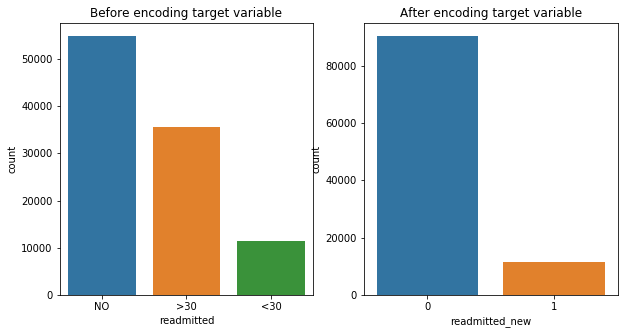

In [10]:
figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(df.readmitted,ax=axes[0]).set_title('Before encoding target variable')
sns.countplot(df.readmitted_new,ax=axes[1]).set_title('After encoding target variable')
plt.savefig('Target Variable.png')

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;"> 2) encounter_id	patient_nbr

In [11]:
# checking for duplicate entries
df.encounter_id.duplicated().sum()

0

In [12]:
# checking for duplicate entries
df.patient_nbr.duplicated().sum()

30248

In [13]:
df[df.patient_nbr.duplicated()].shape

(30248, 51)

In [14]:
df[df.patient_nbr == 23043240]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_new
68,796152,23043240,Caucasian,Female,[50-60),?,2,1,4,2,...,Steady,No,No,No,No,No,No,Yes,<30,1
79,1070256,23043240,Caucasian,Female,[50-60),?,2,1,4,3,...,Steady,No,No,No,No,No,No,Yes,>30,0
12923,52009764,23043240,Caucasian,Female,[50-60),?,2,1,4,4,...,Steady,No,No,No,No,No,No,Yes,NO,0


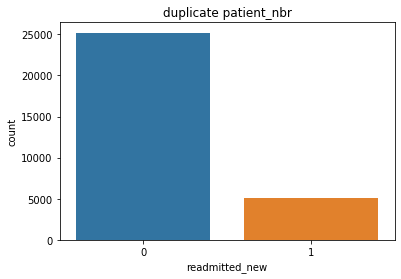

In [15]:
sns.countplot(df[df.patient_nbr.duplicated()]['readmitted_new']).set_title('duplicate patient_nbr')
plt.savefig('duplicate patient_nbr.png')
plt.show()

In [16]:
# Keeping the First entry
df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')['readmitted_new'].value_counts()

0    65225
1     6293
Name: readmitted_new, dtype: int64

In [17]:
# Keeping the last entry
df.drop_duplicates(subset= ['patient_nbr'], keep = 'last')['readmitted_new'].value_counts()

0    68294
1     3224
Name: readmitted_new, dtype: int64

In [18]:
print('Before removing duplicate entries',df.shape)
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
print('After removing duplicate entries',df.shape)

Before removing duplicate entries (101766, 51)
After removing duplicate entries (71518, 51)


# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;"> 3) Numeric Features

In [19]:
numeric_var =  ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient'
                ,'number_emergency','number_inpatient','number_diagnoses']

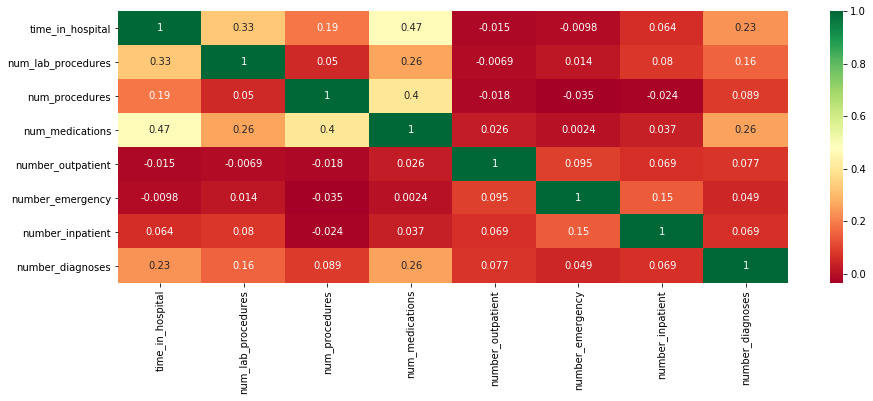

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(df[numeric_var].corr(),cmap='RdYlGn',annot=True)
plt.savefig('heat_map.png')

In [21]:
def outlier(temp1,nm,t):
    l = nm
    r=1.5
    Q3 = temp1[l].quantile(q=.75)
    Q1 = temp1[l].quantile(q=.25)
    IQR = Q3-Q1
    upper_limit = Q3 + (IQR*r)
    lower_limit = Q1 - (IQR*r)
    outlier_no = temp1[(temp1[l] < lower_limit) | (temp1[l] > upper_limit)].shape
    print('Out of {} observations, total outliers/extreme values in feature {} is {}'.format(temp1.shape[0],l.upper(),outlier_no[0]))
    plt.figure(figsize=(15,5))
    sns.boxplot(temp1['readmitted_new'],temp1[l]).set_title('boxplot of '+nm)
    print('\n')
    plt.savefig(t)
    plt.show()

Out of 71518 observations, total outliers/extreme values in feature TIME_IN_HOSPITAL is 1464




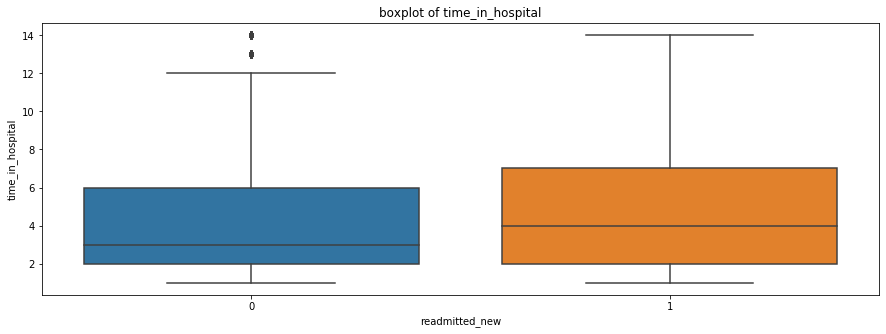

Out of 71518 observations, total outliers/extreme values in feature NUM_LAB_PROCEDURES is 114




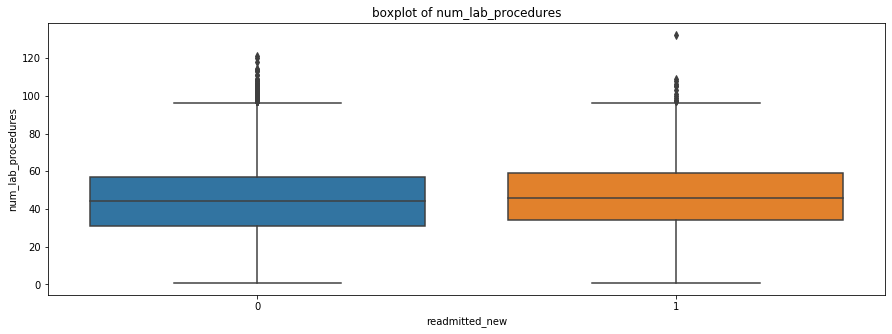

Out of 71518 observations, total outliers/extreme values in feature NUM_PROCEDURES is 3956




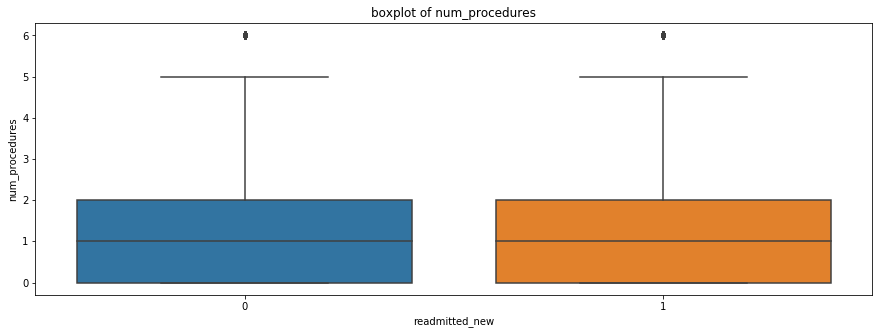

Out of 71518 observations, total outliers/extreme values in feature NUM_MEDICATIONS is 1925




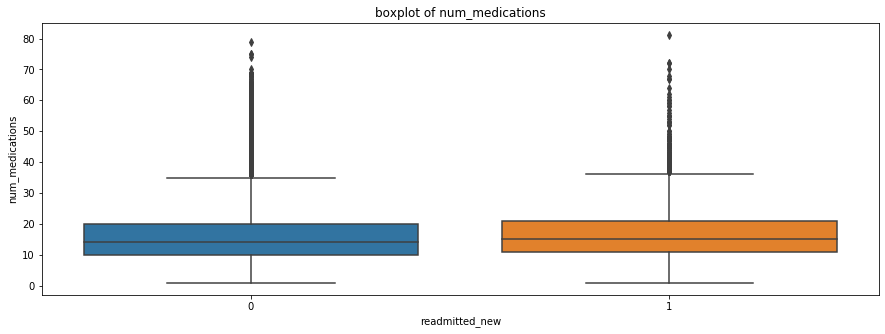

Out of 71518 observations, total outliers/extreme values in feature NUMBER_OUTPATIENT is 9306




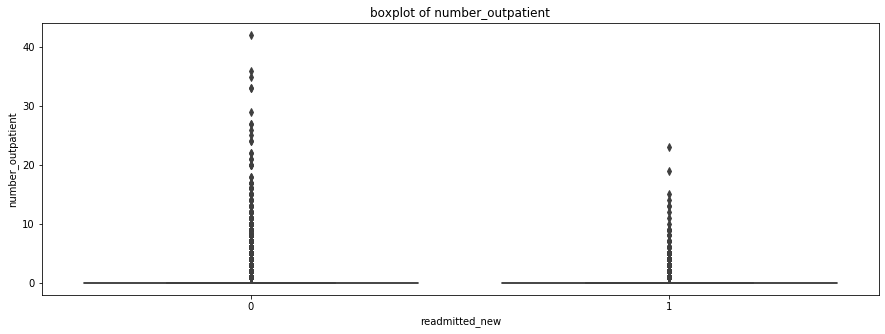

Out of 71518 observations, total outliers/extreme values in feature NUMBER_EMERGENCY is 5204




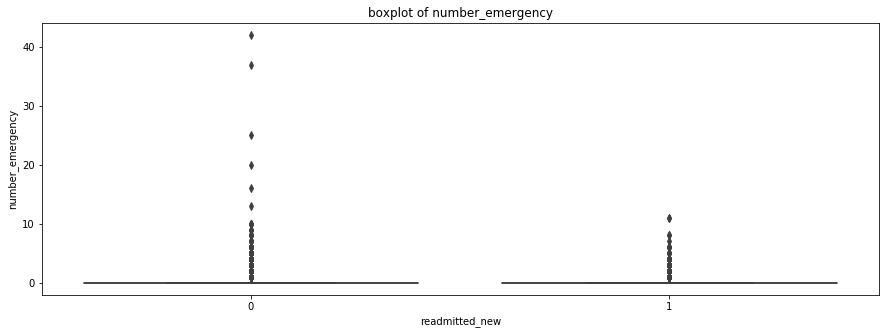

Out of 71518 observations, total outliers/extreme values in feature NUMBER_INPATIENT is 8441




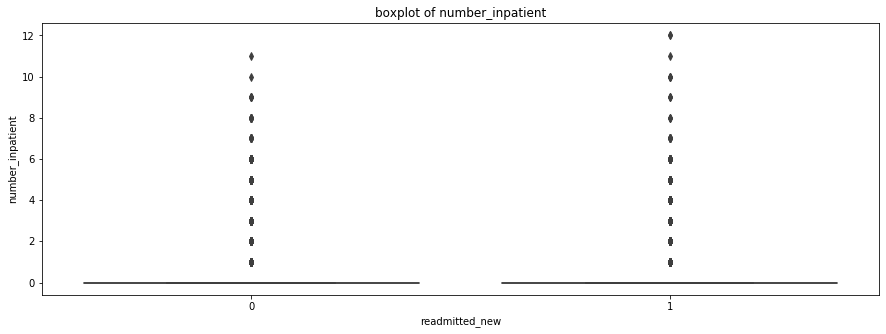

Out of 71518 observations, total outliers/extreme values in feature NUMBER_DIAGNOSES is 236




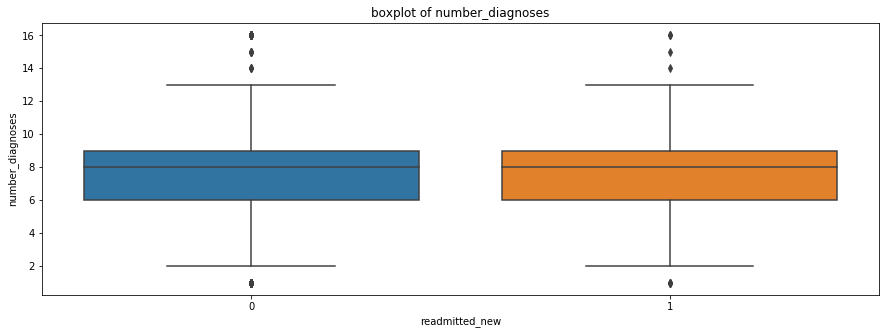

In [22]:
for i in numeric_var:
    img_ext = i+'.png'
    outlier(df,i,img_ext)

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">  4) Race

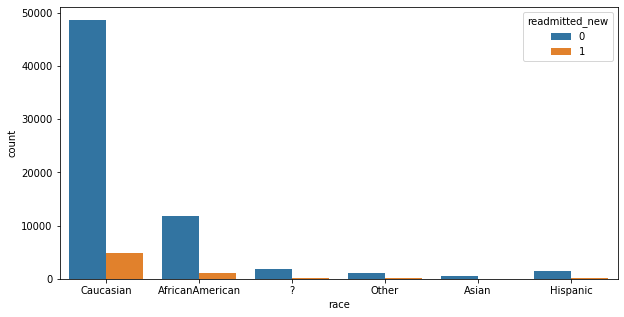

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(df.race,hue=df.readmitted_new)

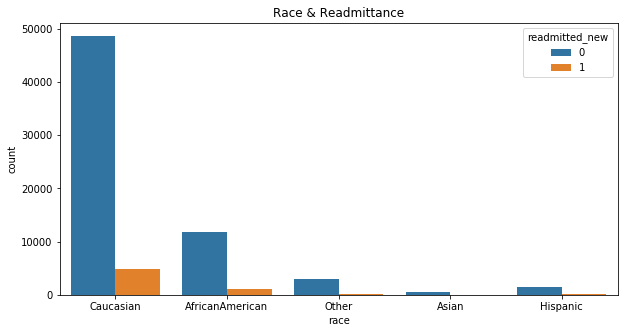

In [24]:
# we will impute the missing value of race with "Other".
df.race = df.race.replace('?','Other')
plt.figure(figsize=(10,5))
sns.countplot(df.race,hue=df.readmitted_new).set_title('Race & Readmittance')
plt.savefig('Race & Readmittance plot.png')
plt.show()

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">   5) gender

Female             38025
Male               33490
Unknown/Invalid        3
Name: gender, dtype: int64


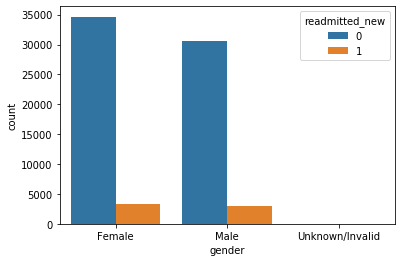

In [25]:
print(df.gender.value_counts())
sns.countplot(df.gender,hue=df.readmitted_new)

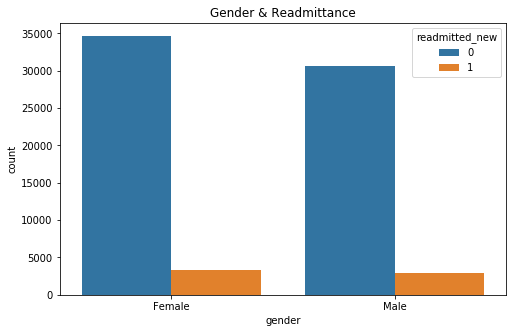

In [26]:
#as there are only 3 unknown or invalid gender type we can impute with "Female" as they are maximum in dataset. 
df.gender =  df.gender.replace('Unknown/Invalid','Female')
plt.figure(figsize=(8,5))
sns.countplot(df.gender,hue=df.readmitted_new).set_title('Gender & Readmittance')
plt.savefig('Gender & Readmittance.png')

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">6) age

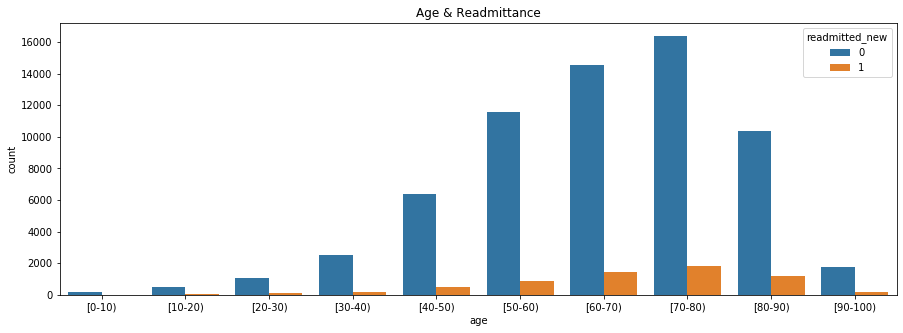

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(df.age,hue=df.readmitted_new).set_title('Age & Readmittance')
plt.savefig('Age & Readmittance.png')

In [28]:
# Generally in real world dataset the age is grouped within the intervals of 10. We will create the new variable with the age. 
# grouping based on https://www.researchgate.net/figure/Age-intervals-and-age-groups_tbl1_228404297
age_imp = {'[0-10)':'Young Adults',
           '[10-20)':'Young Adults', 
           '[20-30)':'Young Adults', 
           '[30-40)':'Young Adults', 
           '[40-50)':'Middle Age Adults', 
           '[50-60)':'Middle Age Adults',
           '[60-70)':'Old Adults',
           '[70-80)':'Old Adults',
           '[80-90)':'Old Adults',
           '[90-100)':'Old Adults'}
df.age_category = df.age.replace(age_imp)

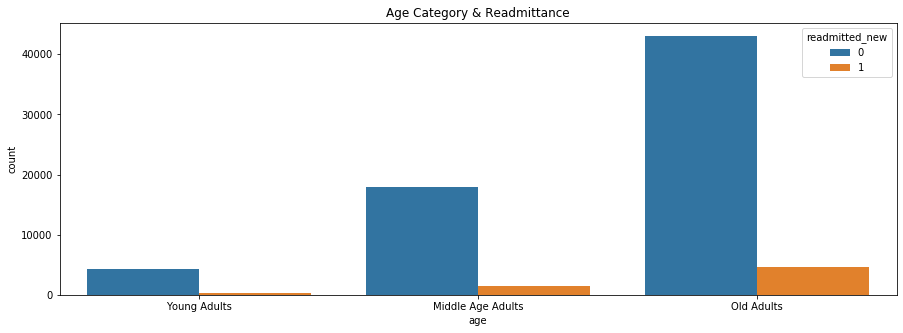

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(df.age_category,hue=df.readmitted_new).set_title('Age Category & Readmittance')
plt.savefig('Age Category & Readmittance.png')

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">   7)weight

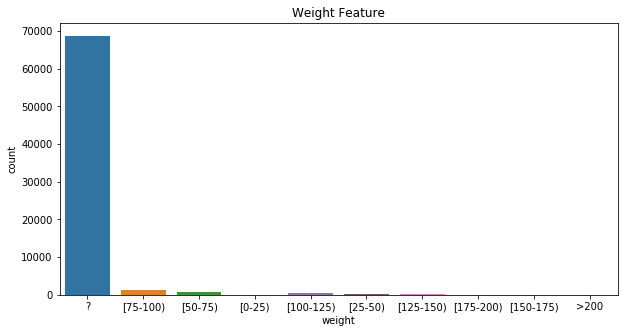

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(df.weight).set_title('Weight Feature')
plt.savefig('weight.png')

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;"> 8) IDs conversion: 
    
i) admission_type_id

ii) discharge_disposition_id	

iii) admission_source_id


In [31]:
ad_type_id = {1:'Emergency',
2:'Urgent',
3:'Elective',
4:'Newborn',
5:'Not Available',
6:'NULL',
7:'Trauma Center',
8:'Not Mapped'}

In [32]:
discharge_disposition_id = {1:'Discharged to home',
2:'Discharged/transferred to another short term hospital',
3:'Discharged/transferred to SNF',
4:'Discharged/transferred to ICF',
5:'Discharged/transferred to another type of inpatient care institution',
6:'Discharged/transferred to home with home health service',
7:'Left AMA',
8:'Discharged/transferred to home under care of Home IV provider',
9:'Admitted as an inpatient to this hospital',
10:'Neonate discharged to another hospital for neonatal aftercare',
11:'Expired',
12:'Still patient or expected to return for outpatient services',
13:'Hospice / home',
14:'Hospice / medical facility',
15:'Discharged/transferred within this institution to Medicare approved swing bed',
16:'Discharged/transferred/referred another institution for outpatient services',
17:'Discharged/transferred/referred to this institution for outpatient services',
18:'NULL',
19:'Expired at home. Medicaid only, hospice.',
20:'Expired in a medical facility. Medicaid only, hospice.',
21:'Expired, place unknown. Medicaid only, hospice.',
22:'Discharged/transferred to another rehab fac including rehab units of a hospital .',
23:'Discharged/transferred to a long term care hospital.',
24:'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
25:'Not Mapped',
26:'Unknown/Invalid',
30:'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
27:'Discharged/transferred to a federal health care facility.',
28:'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
29:'Discharged/transferred to a Critical Access Hospital (CAH).'}

In [33]:
admission_sid = {1:' Physician Referral',
2:'Clinic Referral',
3:'HMO Referral',
4:'Transfer from a hospital',
5:'Transfer from a Skilled Nursing Facility (SNF)',
6:'Transfer from another health care facility',
7:'Emergency Room',
8:'Court/Law Enforcement',
9:'Not Available',
10:'Transfer from critial access hospital',
11:'Normal Delivery',
12:'Premature Delivery',
13:'Sick Baby',
14:'Extramural Birth',
15:'Not Available',
17:'NULL',
18:'Transfer From Another Home Health Agency',
19:'Readmission to Same Home Health Agency',
20:'Not Mapped',
21:'Unknown/Invalid',
22:'Transfer from hospital inpt/same fac reslt in a sep claim',
23:'Born inside this hospital',
24:'Born outside this hospital',
25:'Transfer from Ambulatory Surgery Center',
26:'Transfer from Hospice'}

In [34]:
df.admission_type_id = df.admission_type_id.apply(lambda x:ad_type_id[x])
df.discharge_disposition_id = df.discharge_disposition_id.apply(lambda x:discharge_disposition_id[x])
df.admission_source_id = df.admission_source_id.apply(lambda x:admission_sid[x])

In [35]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_new
0,2278392,8222157,Caucasian,Female,[0-10),?,NULL,Not Mapped,Physician Referral,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),?,Emergency,Discharged to home,Emergency Room,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,Emergency,Discharged to home,Emergency Room,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),?,Emergency,Discharged to home,Emergency Room,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),?,Emergency,Discharged to home,Emergency Room,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


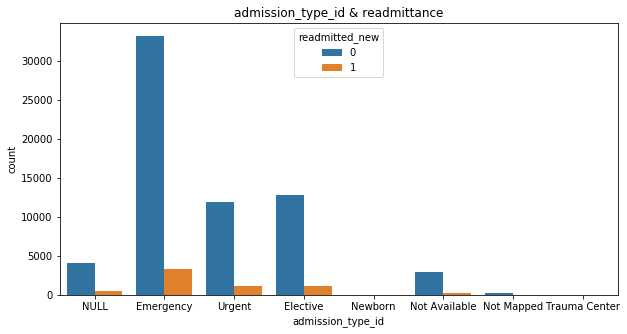

readmitted_new,0,1
admission_type_id,,
Elective,12774,1143
Emergency,33228,3262
NULL,4136,452
Newborn,8,1
Not Available,2909,265
Not Mapped,270,21
Trauma Center,21,0
Urgent,11879,1149


In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df.admission_type_id,hue=df.readmitted_new).set_title('admission_type_id & readmittance')
plt.savefig('admission_type_id & readmittance.png')
plt.show()
pd.crosstab(index=df['admission_type_id'],columns=df['readmitted_new'])

readmitted_new,0,1
discharge_disposition_id,,
Discharged to home,41239,3078
Discharged/transferred to SNF,7608,1176
Discharged/transferred to home with home health service,7500,789
Discharged/transferred to another rehab fac including rehab units of a hospital .,1039,371
NULL,2223,251
Discharged/transferred to another short term hospital,1327,212
Discharged/transferred to another type of inpatient care institution,725,188
Discharged/transferred to ICF,485,56
Not Mapped,730,48


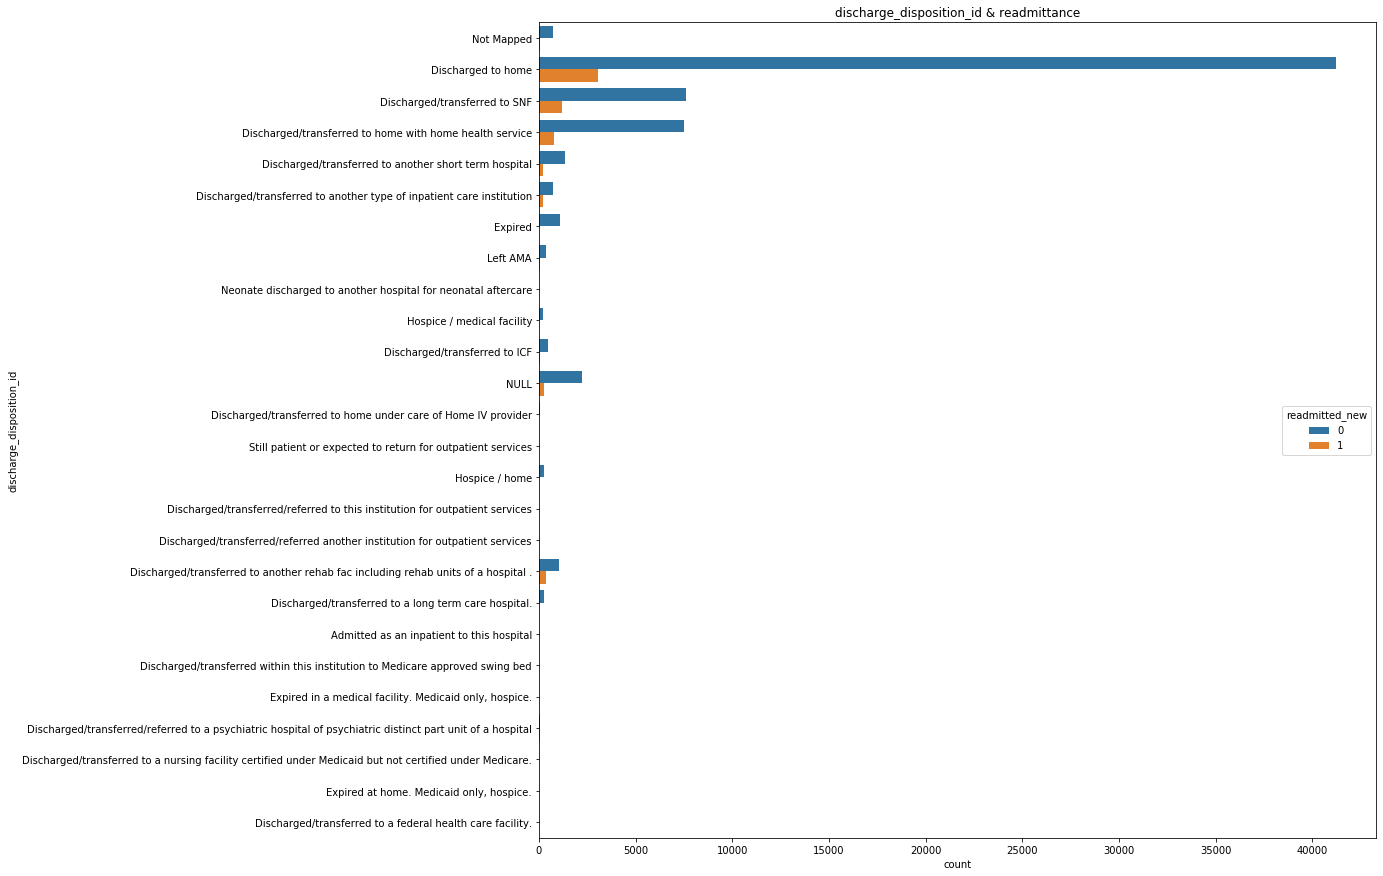

In [37]:
plt.figure(figsize=(15,15))
sns.countplot(y=df.discharge_disposition_id,hue=df.readmitted_new).set_title('discharge_disposition_id & readmittance')
plt.savefig('discharge_disposition_id & readmittance.png')
pd.crosstab(index=df['discharge_disposition_id'],columns=df['readmitted_new']).sort_values(1,ascending=False)

readmitted_new,0,1
admission_source_id,,
Emergency Room,34833,3457
Physician Referral,20132,1875
NULL,4526,423
Transfer from a hospital,2367,216
Transfer from another health care facility,1657,144
Clinic Referral,845,81
Transfer from a Skilled Nursing Facility (SNF),497,48
Not Mapped,134,21
HMO Referral,119,19


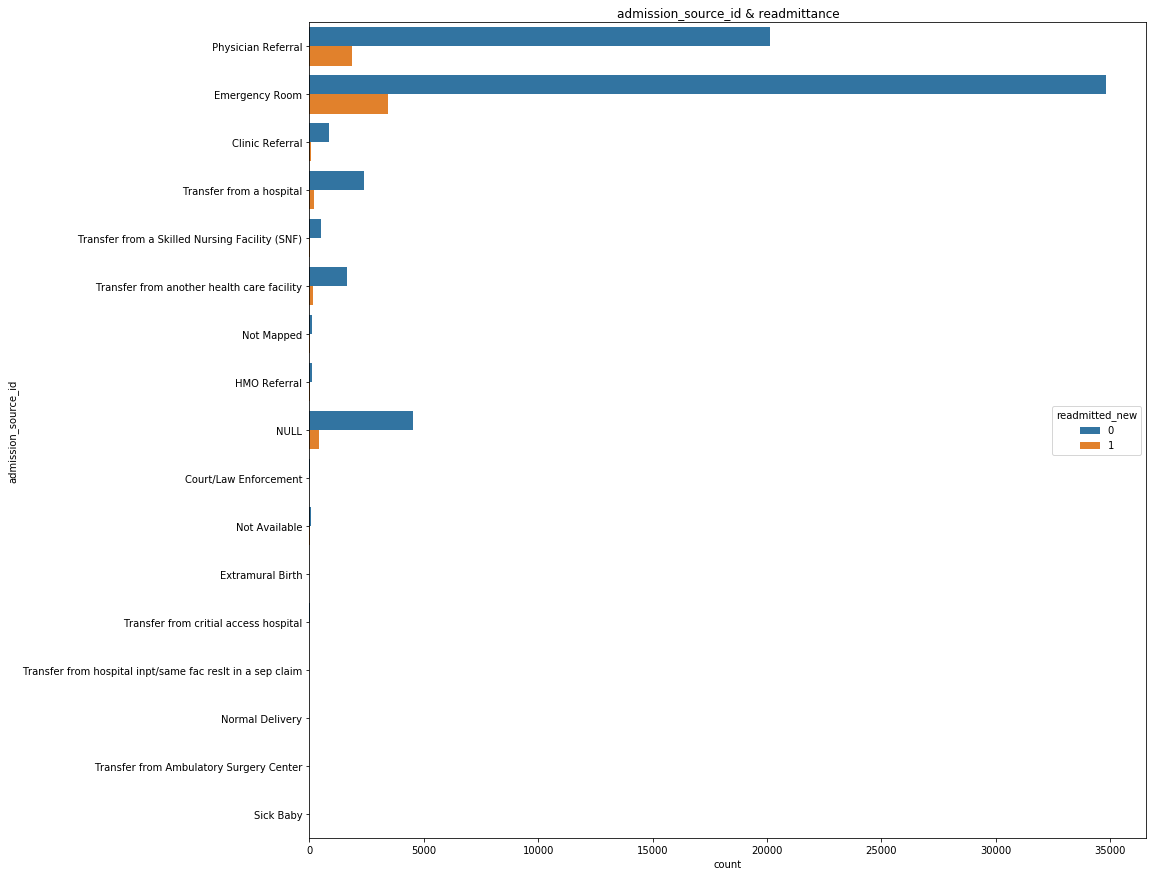

In [38]:
plt.figure(figsize=(15,15))
sns.countplot(y=df.admission_source_id,hue=df.readmitted_new).set_title('admission_source_id & readmittance')
pd.crosstab(index=df['admission_source_id'],columns=df['readmitted_new']).sort_values(1,ascending=False)

In [39]:
#delete_adi = ['13','14','19','20','21','11'] # Deleting the Hospice and expire patients from the dataset. 
print('Before deleting the Hospice and Expire data:',df.shape)
delete_adi = ['Expired','Hospice / home','Hospice / medical facility','Expired at home. Medicaid only, hospice.','Expired in a medical facility. Medicaid only, hospice.','Expired, place unknown. Medicaid only, hospice.']

df = df[~df.discharge_disposition_id.isin(delete_adi)]
print('After deleting the Hospice and Expire data:',df.shape)

Before deleting the Hospice and Expire data: (71518, 51)
After deleting the Hospice and Expire data: (69973, 51)


###  Reducing the values of the id by categorising the low occurance values with "Other"

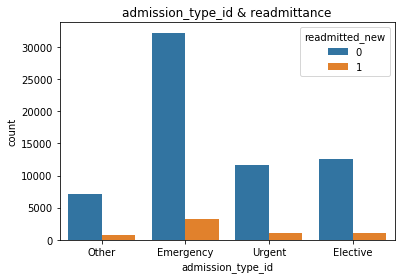

In [40]:
# admission_type_id Encoding with "Other"
l1 = ['Emergency','Urgent','Elective']
condition = df['admission_type_id'].isin(l1)
df['admission_type_id'] = df['admission_type_id'].where(condition,'Other')
#plt.figure(figsize=(10,5))
sns.countplot(df.admission_type_id,hue=df.readmitted_new).set_title('admission_type_id & readmittance')
plt.savefig('admission_type_id & Readmittance.png')
plt.show()

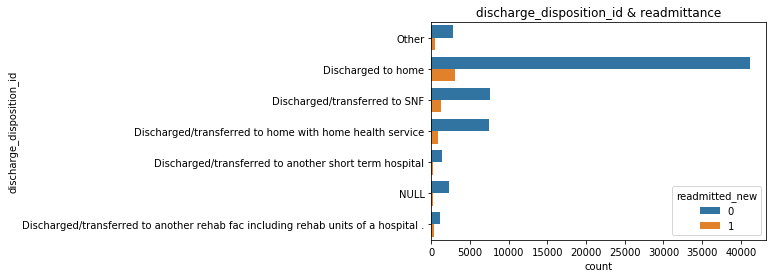

In [41]:
# discharge_disposition_id encoding with "Other" 
reduce_1 = ['Discharged to home',
            'Discharged/transferred to SNF',
            'Discharged/transferred to home with home health service',
           'Discharged/transferred to another rehab fac including rehab units of a hospital .'
           ,'NULL',
            'Discharged/transferred to another short term hospital']

condition1 = df['discharge_disposition_id'].isin(reduce_1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].where(condition1,'Other')
sns.countplot(y=df.discharge_disposition_id,hue=df.readmitted_new).set_title('discharge_disposition_id & readmittance')
plt.savefig('Discharge_disposition_id & Readmittance.png')
plt.show()

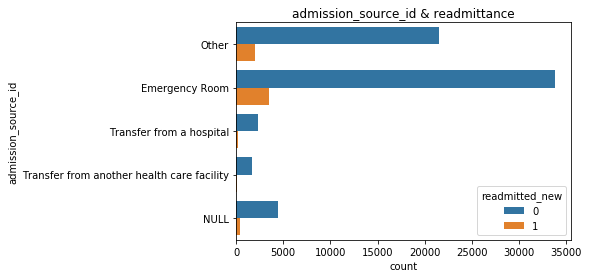

In [42]:
# admission_source_id
reduce_2 = ['Emergency Room',
            'Physician Referral',
            'NULL',
            'Transfer from a hospital',
           'Transfer from another health care facility']

condition2 = df['admission_source_id'].isin(reduce_2)
df['admission_source_id'] = df['admission_source_id'].where(condition2,'Other')
sns.countplot(y=df.admission_source_id,hue=df.readmitted_new).set_title('admission_source_id & readmittance')
plt.savefig('admission_source_id & Readmittance.png')
plt.show()

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">  9) payer_code

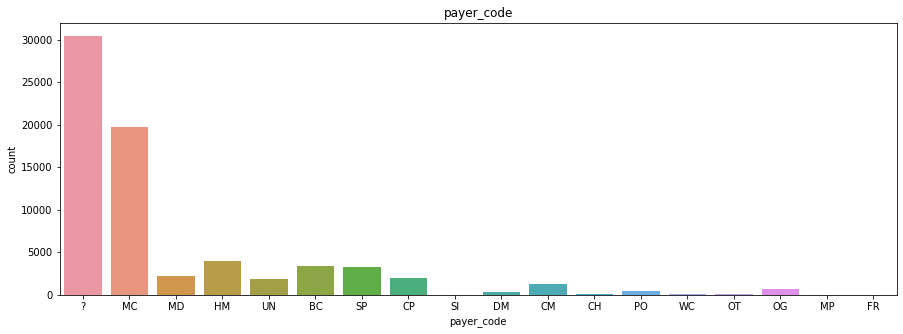

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(df.payer_code).set_title('payer_code')
plt.savefig('payer_code.png')

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;"> 10) medical_specialty

In [44]:
df['medical_specialty'] = df['medical_specialty'].replace('?','Unknown')
pd.crosstab(index=df['medical_specialty'],columns=df['readmitted_new']).sort_values(1,ascending=False)

readmitted_new,0,1
medical_specialty,,
Unknown,30535,3104
InternalMedicine,9602,1039
Family/GeneralPractice,4493,485
Emergency/Trauma,4049,344
Cardiology,3905,302
Surgery-General,2021,184
Orthopedics,1016,112
Nephrology,709,88
Orthopedics-Reconstructive,972,69


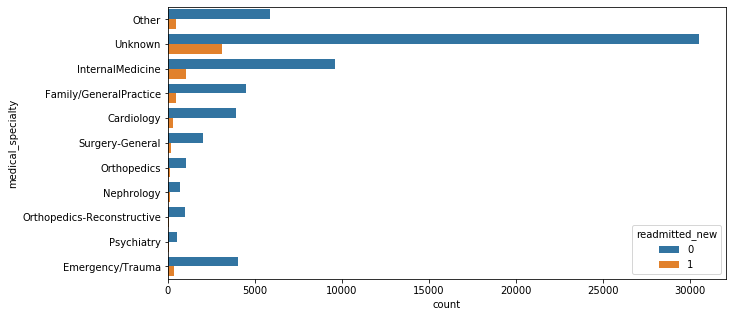

In [45]:
reduce_3 = list(pd.crosstab(index=df['medical_specialty'],columns=df['readmitted_new']).sort_values(1,ascending=False).head(10).index)
condition3 = df['medical_specialty'].isin(reduce_3)
df['medical_specialty'] = df['medical_specialty'].where(condition3,'Other')
plt.figure(figsize=(10,5))
sns.countplot(y=df['medical_specialty'],hue=df.readmitted_new)
plt.savefig('Medical Speciality & Readmittance.png')

In [46]:
# before moving on to next step we will replace '?' with np.nan
fun_view()

,null_values,? Values,% ? Values,unique_values
encounter_id,0,0,0.00,69973
patient_nbr,0,0,0.00,69973
race,0,0,0.00,5
gender,0,0,0.00,2
age,0,0,0.00,10
weight,0,67185,96.02,10
admission_type_id,0,0,0.00,4
discharge_disposition_id,0,0,0.00,7
admission_source_id,0,0,0.00,5
time_in_hospital,0,0,0.00,14


In [47]:
df.replace('?',np.nan,inplace=True) # Replace Null values with Np.nan
print('Befor deletion of cols',df.shape)
# Deleting the ID columns
list_delete = ['encounter_id','patient_nbr','weight','payer_code']
df.drop(list_delete,inplace=True,axis=1,errors='ignore')
print('After deletion of cols',df.shape)

Befor deletion of cols (69973, 51)
After deletion of cols (69973, 47)


In [48]:
fun_view()

,null_values,? Values,% ? Values,unique_values
race,0,0,0.0,5
gender,0,0,0.0,2
age,0,0,0.0,10
admission_type_id,0,0,0.0,4
discharge_disposition_id,0,0,0.0,7
admission_source_id,0,0,0.0,5
time_in_hospital,0,0,0.0,14
medical_specialty,0,0,0.0,11
num_lab_procedures,0,0,0.0,116
num_procedures,0,0,0.0,7


#  <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;"> 11) diag_1, diag_2, diag_3

In [49]:
# Remove null values in diag_1, diag_2, diag_3
df.dropna(inplace=True)
df.shape

(68689, 47)

In [50]:
#We are going to use the ICD9 code of disease data availble on wikipedia.

In [51]:
# Creating the dictionary for ICD-9 imputation
dict11 = {'infectious and parasitic diseases':(1,139)
         ,'neoplasms':(140,239)
         ,'endocrine, nutritional and metabolic diseases, and immunity disorders':(240,279)
         ,'diseases of the blood and blood-forming organs':(280,289)
         ,'mental disorders':(290,319)
         ,'diseases of the nervous system and sense organs':(320,389)
         ,'diseases of the circulatory system':(390,459)
         ,'diseases of the respiratory system':(460,519)
         ,'diseases of the digestive system':(520,579)
         ,'diseases of the genitourinary system':(580,629)
         ,'complications of pregnancy, childbirth, and the puerperium':(630,679)
         ,'diseases of the skin and subcutaneous tissue':(680,709)
         ,'diseases of the musculoskeletal system and connective tissue':(710,739)
         ,'congenital anomalies':(740,759)
         ,'certain conditions originating in the perinatal period':(760,779)
         ,'symptoms, signs, and ill-defined conditions':(780,799)
         ,'injury and poisoning':(800,999)
         ,'external causes of injury and supplemental classification':(1000,2000)}

In [52]:
def fun_diag_imp(x):
    for i in dict11:
        if x >= dict11[i][0] and x <= dict11[i][1]:
            return i

def fun_1(name):
    
    condition1 =  df[name].str.find('V') == 0
    df[name] =  df[name].mask(condition1,1000)

    condition2 =  df[name].str.find('E') == 0
    df[name] =  df[name].mask(condition2,1000)

    df[name] = df[name].astype(float)
    
    df[name] = df[name].apply(fun_diag_imp)
    print('Imputation done on column',name)

In [53]:
fun_1('diag_1')
fun_1('diag_2')
fun_1('diag_3')

Imputation done on column diag_1
Imputation done on column diag_2
Imputation done on column diag_3


In [54]:
df[['diag_1','diag_2','diag_3']].head()

,diag_1,diag_2,diag_3
1,"endocrine, nutritional and metabolic diseases,...","endocrine, nutritional and metabolic diseases,...","endocrine, nutritional and metabolic diseases,..."
2,"complications of pregnancy, childbirth, and th...","endocrine, nutritional and metabolic diseases,...",external causes of injury and supplemental cla...
3,infectious and parasitic diseases,"endocrine, nutritional and metabolic diseases,...",diseases of the circulatory system
4,neoplasms,neoplasms,"endocrine, nutritional and metabolic diseases,..."
5,diseases of the circulatory system,diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,..."


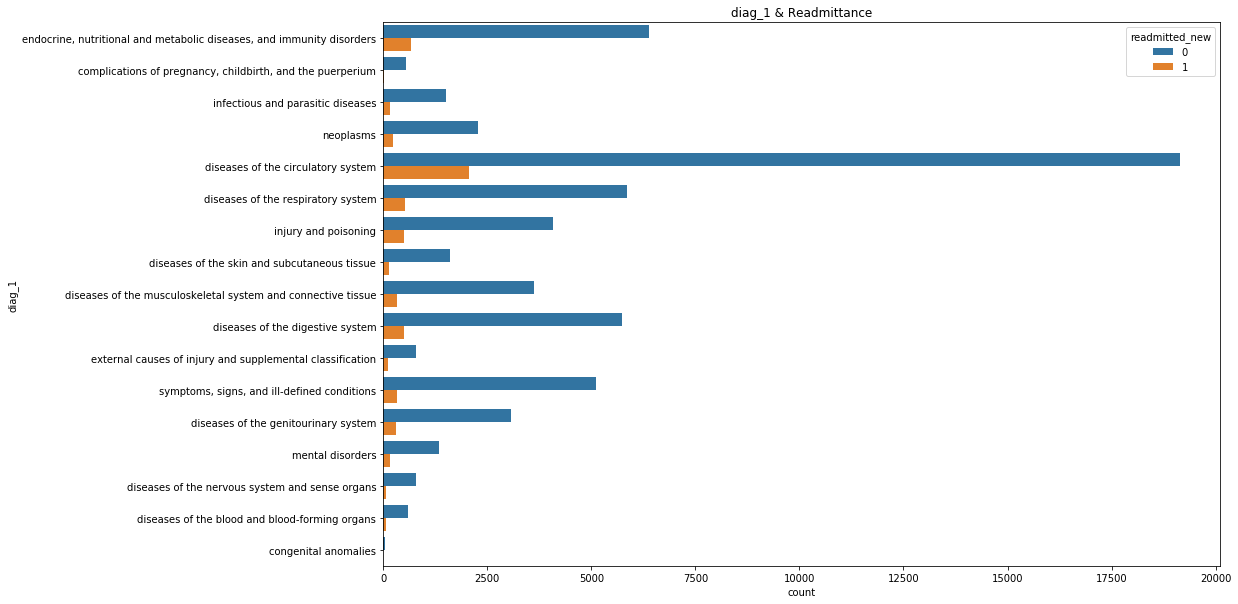

readmitted_new,0,1
diag_1,,
diseases of the circulatory system,19153,2056
"endocrine, nutritional and metabolic diseases, and immunity disorders",6389,667
diseases of the respiratory system,5846,535
injury and poisoning,4079,497
diseases of the digestive system,5729,497
"symptoms, signs, and ill-defined conditions",5101,342
diseases of the musculoskeletal system and connective tissue,3634,337
diseases of the genitourinary system,3074,305
neoplasms,2270,228


In [55]:
plt.figure(figsize=(15,10))
sns.countplot(y=df.diag_1,hue=df.readmitted_new).set_title('diag_1 & Readmittance')
plt.savefig('diag_1 & readmittance.png')
plt.show()
pd.crosstab(df.diag_1,df.readmitted_new).sort_values(1,ascending=False)

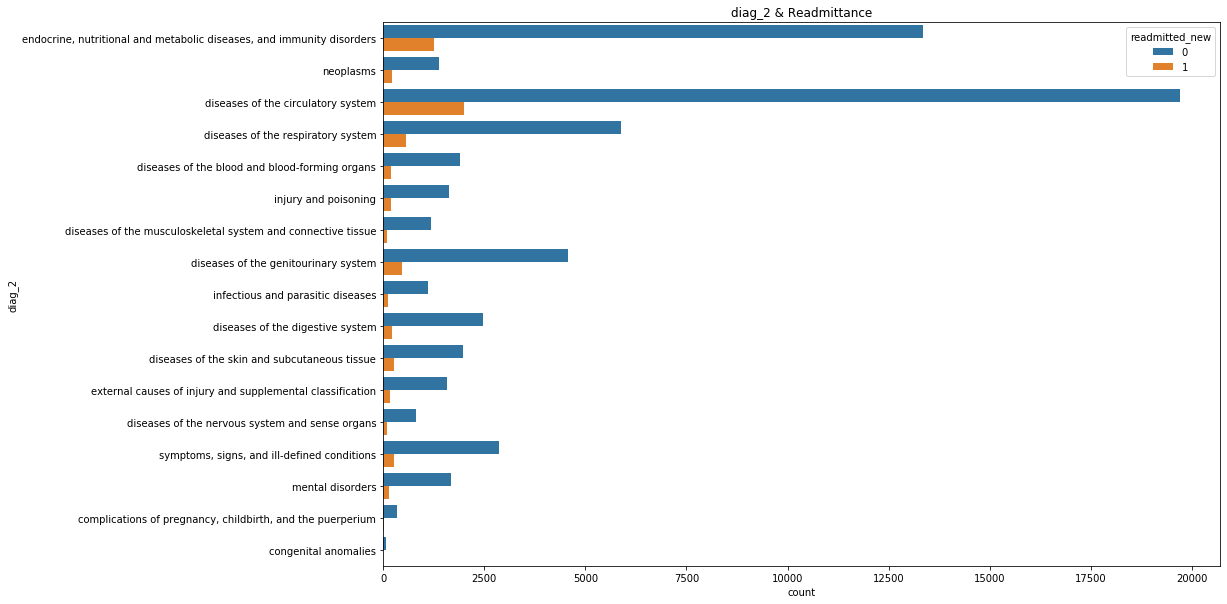

In [56]:
plt.figure(figsize=(15,10))
sns.countplot(y=df.diag_2,hue=df.readmitted_new).set_title('diag_2 & Readmittance')
plt.savefig('diag_2 & readmittance.png')
plt.show()

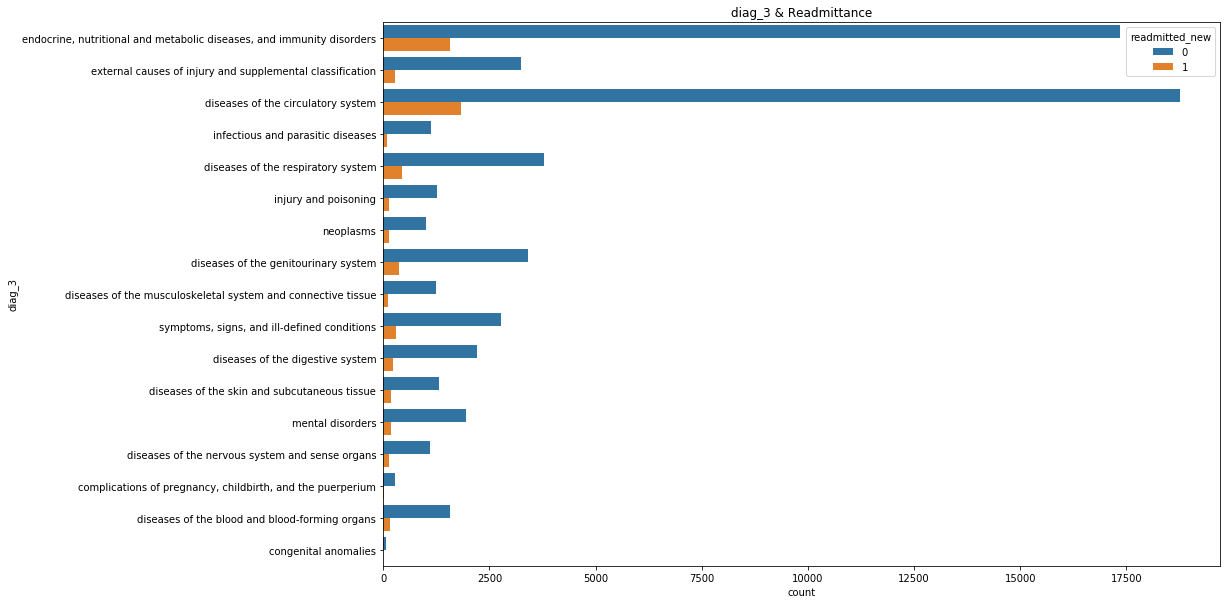

In [57]:
plt.figure(figsize=(15,10))
sns.countplot(y=df.diag_3,hue=df.readmitted_new).set_title('diag_3 & Readmittance')
plt.savefig('diag_3 & readmittance.png')
plt.show()

In [58]:
df.to_csv('tableu_file2.csv')

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">  12) max_glu_serum

readmitted_new,0,1
max_glu_serum,,
>200,817,102
>300,617,72
None,59543,5873
Norm,1501,164


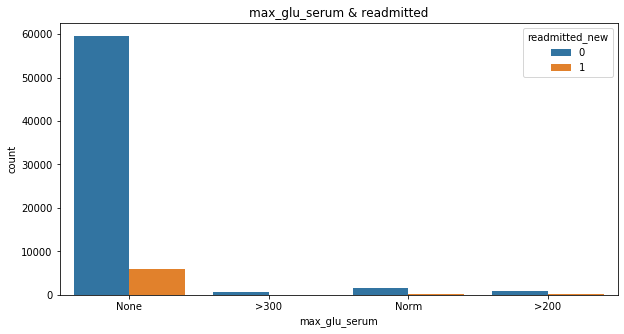

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(df.max_glu_serum,hue=df.readmitted_new).set_title('max_glu_serum & readmitted')
plt.savefig('max_glu_serum & readmittance.png')
pd.crosstab(df.max_glu_serum,df.readmitted_new)

In [60]:
encode1 = {'None':0,'Norm':1,'>200':2,'>300':3}
df.max_glu_serum = df.max_glu_serum.replace(encode1)

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">  13) A1Cresult

readmitted_new,0,1
A1Cresult,,
>7,2597,244
>8,5434,496
None,51079,5150
Norm,3368,321


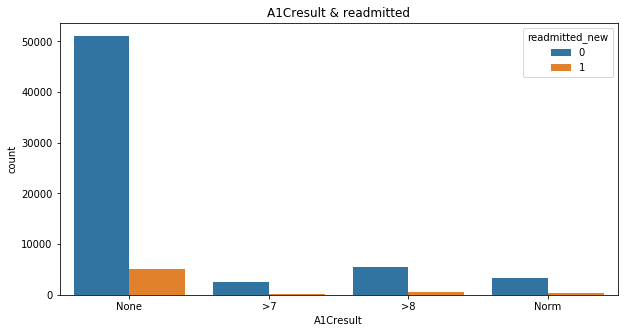

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(df.A1Cresult,hue=df.readmitted_new).set_title('A1Cresult & readmitted')
plt.savefig('A1Cresult & readmittance.png')
pd.crosstab(df.A1Cresult,df.readmitted_new)

In [62]:
encode1 = {'None':0,'Norm':1,'>7':2,'>8':3}
df.A1Cresult = df.A1Cresult.replace(encode1)

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;"> 14) Medicine Columns

In [63]:
medicine_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone','examide','citoglipton']

In [64]:
df[medicine_columns].apply(lambda x:len(x.unique()))

metformin                   4
repaglinide                 4
nateglinide                 4
chlorpropamide              4
glimepiride                 4
acetohexamide               2
glipizide                   4
glyburide                   4
tolbutamide                 2
pioglitazone                4
rosiglitazone               4
acarbose                    3
miglitol                    4
troglitazone                2
tolazamide                  2
insulin                     4
glyburide-metformin         4
glipizide-metformin         2
glimepiride-pioglitazone    1
metformin-rosiglitazone     2
metformin-pioglitazone      2
examide                     1
citoglipton                 1
dtype: int64

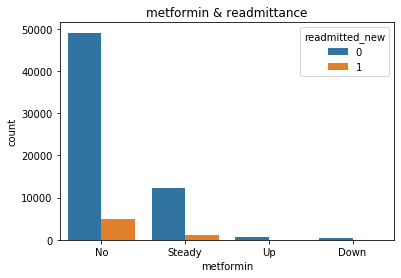

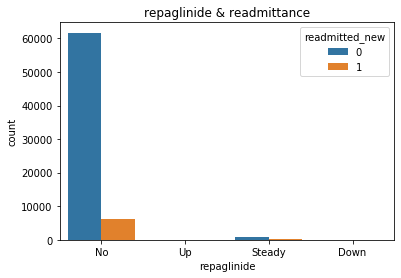

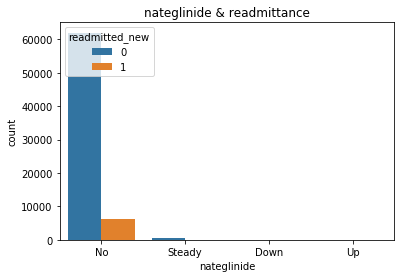

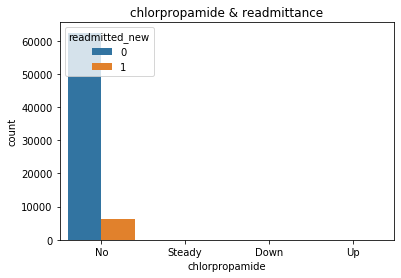

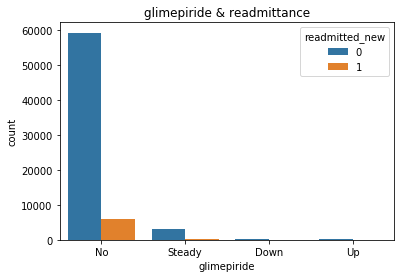

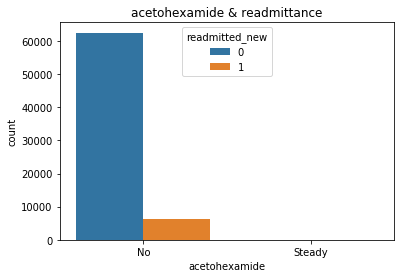

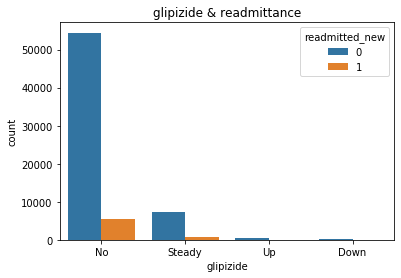

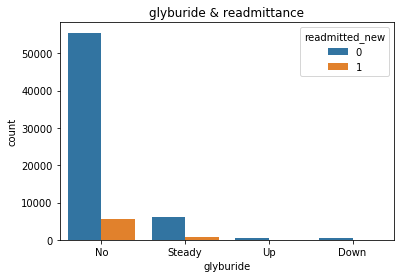

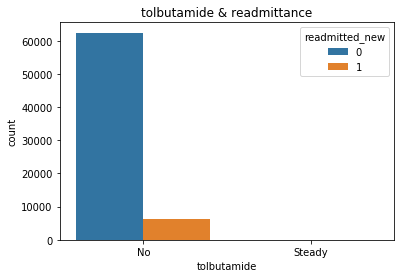

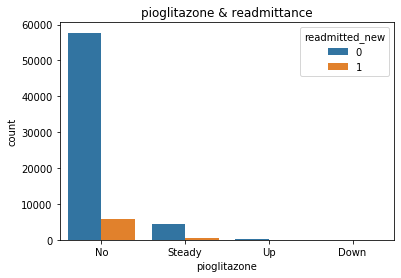

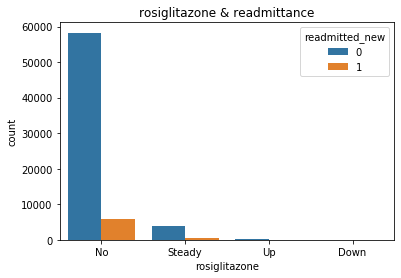

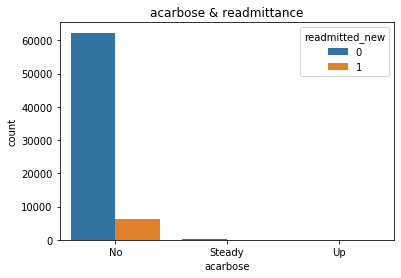

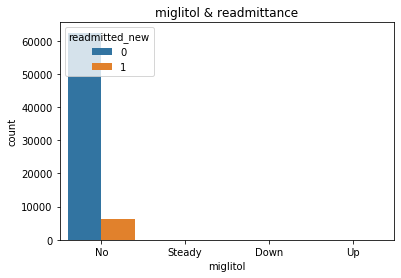

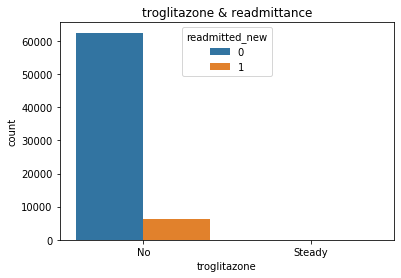

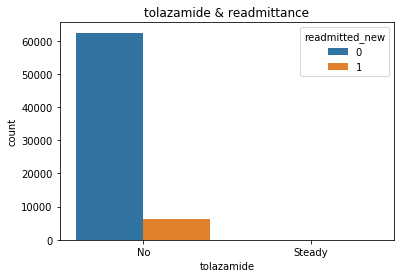

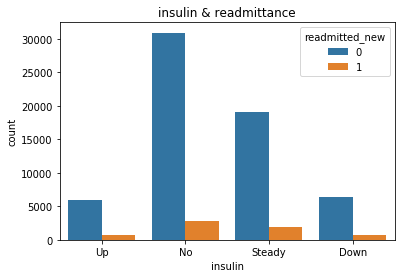

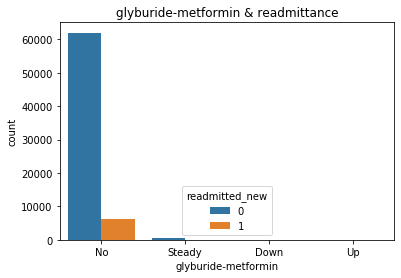

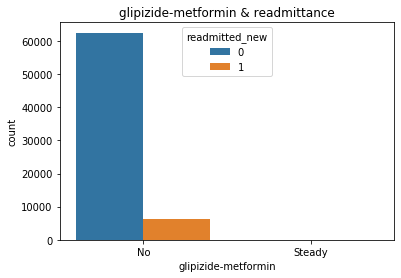

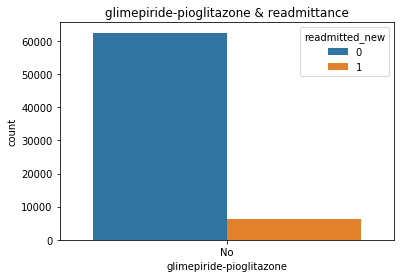

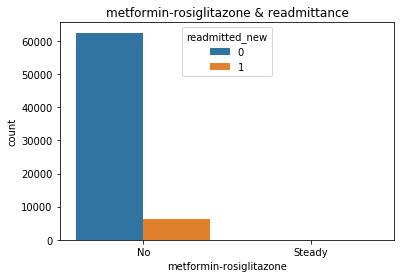

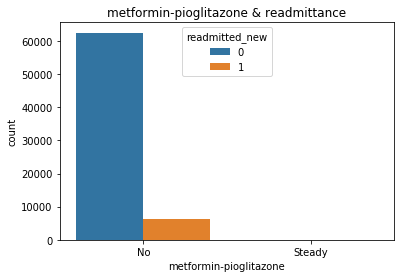

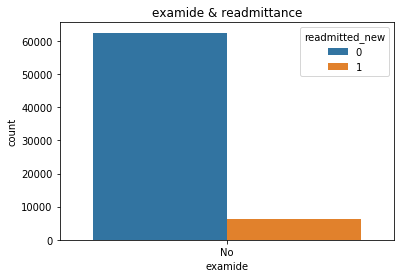

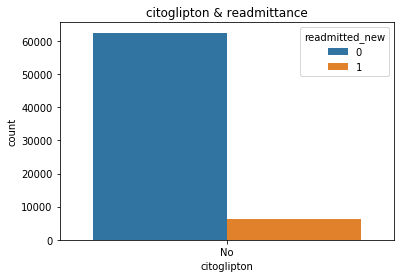

In [65]:
def fun_countplot(temp):
    for i in temp.columns:
        
        sns.countplot(temp[i],hue=df['readmitted_new']).set_title(i + ' & readmittance')
        plt.savefig(i+'png')
        plt.show()

fun_countplot(df[medicine_columns])

In [66]:
impute2 = {'No':0,'Steady':2,'Up':3,'Down':1}
def fun_transform(i):
    df[i] = df[i].replace(impute2)
    df[i] = df[i].astype(int)

In [67]:
for j in medicine_columns:
    fun_transform(j)

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;"> 15) change

readmitted_new,0,1
change,,
Ch,28003,2944
No,34475,3267


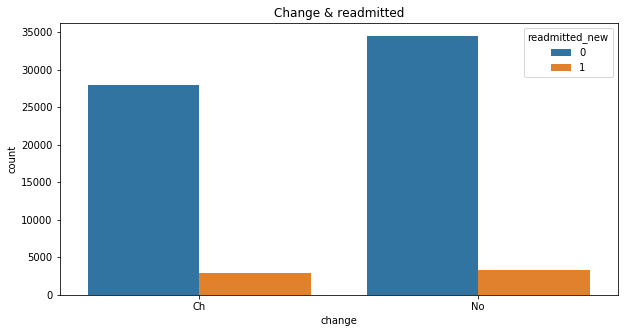

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(df.change,hue=df.readmitted_new).set_title('Change & readmitted')
plt.savefig('Change.png')
pd.crosstab(df.change,df.readmitted_new)

In [69]:
# Encoding the change with 0 & 1
df.change = df.change.apply(lambda x: 0 if x=='No' else 1)

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;"> 16) diabetesMed

readmitted_new,0,1
diabetesMed,,
No,15159,1249
Yes,47319,4962


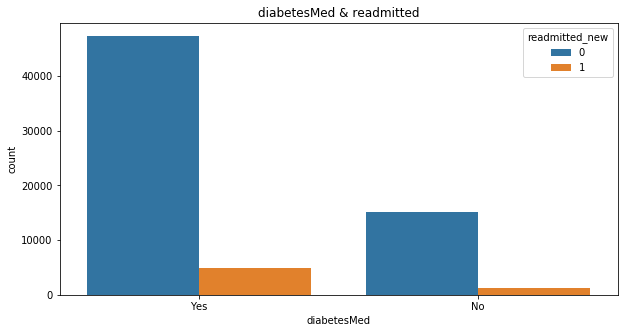

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(df.diabetesMed,hue=df.readmitted_new).set_title('diabetesMed & readmitted')
plt.savefig('diabetesMed.png')
pd.crosstab(df.diabetesMed,df.readmitted_new)

In [71]:
# Encoding the DiabetesMed with 0 & 1
df.diabetesMed = df.diabetesMed.apply(lambda x: 0 if x=='No' else 1)

In [72]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_new
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,Unknown,59,0,18,0,0,0,"endocrine, nutritional and metabolic diseases,...","endocrine, nutritional and metabolic diseases,...","endocrine, nutritional and metabolic diseases,...",9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,>30,0
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,Unknown,11,5,13,2,0,1,"complications of pregnancy, childbirth, and th...","endocrine, nutritional and metabolic diseases,...",external causes of injury and supplemental cla...,6,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NO,0
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,Unknown,44,1,16,0,0,0,infectious and parasitic diseases,"endocrine, nutritional and metabolic diseases,...",diseases of the circulatory system,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,NO,0
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,Unknown,51,0,8,0,0,0,neoplasms,neoplasms,"endocrine, nutritional and metabolic diseases,...",5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,NO,0
5,Caucasian,Male,[50-60),Urgent,Discharged to home,Other,3,Unknown,31,6,16,0,0,0,diseases of the circulatory system,diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,...",9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,>30,0


In [73]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_new'],
      dtype='object')

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##f08513;"> iv) Data Preparation:

In [74]:
#droping the final columns
df.drop(['age','examide','citoglipton','glimepiride-pioglitazone','readmitted'],axis=1,inplace=True,errors='ignore')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_new
1,Caucasian,Female,Emergency,Discharged to home,Emergency Room,3,Unknown,59,0,18,0,0,0,"endocrine, nutritional and metabolic diseases,...","endocrine, nutritional and metabolic diseases,...","endocrine, nutritional and metabolic diseases,...",9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0
2,AfricanAmerican,Female,Emergency,Discharged to home,Emergency Room,2,Unknown,11,5,13,2,0,1,"complications of pregnancy, childbirth, and th...","endocrine, nutritional and metabolic diseases,...",external causes of injury and supplemental cla...,6,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,Emergency,Discharged to home,Emergency Room,2,Unknown,44,1,16,0,0,0,infectious and parasitic diseases,"endocrine, nutritional and metabolic diseases,...",diseases of the circulatory system,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0
4,Caucasian,Male,Emergency,Discharged to home,Emergency Room,1,Unknown,51,0,8,0,0,0,neoplasms,neoplasms,"endocrine, nutritional and metabolic diseases,...",5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,0
5,Caucasian,Male,Urgent,Discharged to home,Other,3,Unknown,31,6,16,0,0,0,diseases of the circulatory system,diseases of the circulatory system,"endocrine, nutritional and metabolic diseases,...",9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0


# we are going to create the model by transform the numerical variable with sqrt and one without sqrt

# without squareroot original dataset

In [75]:
# ORIGINAL DATASET 
x = df.drop('readmitted_new',axis=1)
y = df.readmitted_new
x = pd.get_dummies(x)

# with square root

In [76]:
#Initially after log trasnform, some values going to infinity & getting error while building the model.
#so we have opt for square root transformation

# TRANSFORMING DATA WITH THE SQRT METHOD (INITIALLY GOT THE INFINITY VALUES BY LOG TRANSFORMATION)
x1 = df.drop('readmitted_new',axis=1)
y1 = df.readmitted_new
x1 = pd.get_dummies(x1)

for i in numeric_var:
    x1[i] = np.sqrt(x1[i])

In [77]:
print(x.shape) #original
x.get_dtype_counts()

(68689, 117)


int32    20
int64    12
uint8    85
dtype: int64

In [78]:
print(x1.shape) #squareroot
x1.get_dtype_counts()

(68689, 117)


float64     8
int32      20
int64       4
uint8      85
dtype: int64

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##f08513;"> v) Feature Selection

#  <span style="font-family: Arial; font-weight:bold;font-size:0.6em;color:#00b3e5;">1) selectKbest  

# BEST FEATURES 20 SELECTED FROM THIS QUERY-original dataset

In [79]:
from sklearn.feature_selection import SelectKBest, chi2
skb = SelectKBest(chi2).fit(x,y)
best_feature = pd.DataFrame((x.columns,skb.scores_)).T.sort_values(by=1,ascending=False)
best = list(best_feature[0].head(20))  ## BEST FEATURES 20 SELECTED FROM THIS QUERY

best_feature.head(30)

,0,1
6,number_inpatient,1403.44
1,num_lab_procedures,625.35
45,discharge_disposition_id_Discharged/transferre...,503.917
0,time_in_hospital,415.662
3,num_medications,352.081
43,discharge_disposition_id_Discharged to home,216.28
44,discharge_disposition_id_Discharged/transferre...,196.725
5,number_emergency,132.857
7,number_diagnoses,57.3251
49,discharge_disposition_id_Other,52.3642


# BEST FEATURES 20 SELECTED FROM THIS QUERY-Sqaureroot dataset

In [80]:
from sklearn.feature_selection import SelectKBest, chi2
skb = SelectKBest(chi2).fit(x1,y1)
best_feature1 = pd.DataFrame((x1.columns,skb.scores_)).T.sort_values(by=1,ascending=False)
best1 = list(best_feature1[0].head(20))  ## BEST FEATURES 20 SELECTED FROM THIS QUERY

best_feature1.head(30)

,0,1
6,number_inpatient,698.595
45,discharge_disposition_id_Discharged/transferre...,503.917
43,discharge_disposition_id_Discharged to home,216.28
44,discharge_disposition_id_Discharged/transferre...,196.725
5,number_emergency,81.681
0,time_in_hospital,53.2168
49,discharge_disposition_id_Other,52.3642
82,"diag_1_symptoms, signs, and ill-defined condit...",50.373
46,discharge_disposition_id_Discharged/transferre...,40.9315
1,num_lab_procedures,36.9869


# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:##f08513;"> Vi) Base Model Building

In [ ]:
x.shape

# logistic model on base original data without transformation

In [82]:
def fun_model(models,x_train, x_test, y_train, y_test):
    col = []; train_score = []; acc = []; kappa=[]; roc = []; prc=[];rec=[];f1=[]
    for i, j in models:
        pred = j.fit(x_train,y_train).predict(x_test)
        col.append(i)
        train_score.append(j.score(x_train,y_train))
        acc.append(accuracy_score(y_test,pred))
        prc.append(precision_score(y_test,pred))
        rec.append(recall_score(y_test,pred))
        f1.append(f1_score(y_test,pred))
        kappa.append(cohen_kappa_score(y_test,pred))
        roc.append(roc_auc_score(y_test,pred))

    return pd.DataFrame({'Model Name':col,
                  'Accuracy on Train set ':train_score,
                  'Accuracy on Test set ':acc,
                         'f1_score':f1,
                    'Cohen Kappa Score':kappa
                    ,})

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.7,random_state=1)
models = [] 
models.append(('Logistic Regression', LogisticRegression(random_state=1)))  
models.append(('Logistic Regression Balanced', LogisticRegression(random_state=1,class_weight='balanced')))
fun_model(models,x_train, x_test, y_train, y_test)

,Model Name,Accuracy on Train set,Accuracy on Test set,f1_score,Cohen Kappa Score
0,Logistic Regression,0.910715,0.906828,0.011329,0.009331
1,Logistic Regression Balanced,0.659810,0.656185,0.221685,0.087452


# Logistic model on Squareroot data

In [84]:
#sqrt Dataset
x_train_sqrt,x_test_sqrt,y_train_sqrt,y_test_sqrt = train_test_split(x1,y1,train_size=.7,random_state=1)
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=1)))
models.append(('Logistic Regression Balanced', LogisticRegression(random_state=1,class_weight='balanced')))
fun_model(models,x_train_sqrt,x_test_sqrt,y_train_sqrt,y_test_sqrt)

,Model Name,Accuracy on Train set,Accuracy on Test set,f1_score,Cohen Kappa Score
0,Logistic Regression,0.910715,0.906828,0.002079,0.001789
1,Logistic Regression Balanced,0.655339,0.651914,0.222439,0.087780


# Choosing only the KBest Features and build the model. 

In [85]:
# Choosing only the KBest Features-Original dataset 
x3 = x[best]
y3 = y.copy()
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x3,y3,train_size=.7,random_state=1)
models = [] 
models.append(('Logistic Regression', LogisticRegression(random_state=1)))  
models.append(('Logistic Regression Balanced', LogisticRegression(random_state=1,class_weight='balanced')))
fun_model(models,x_train_new,x_test_new,y_train_new,y_test_new)

,Model Name,Accuracy on Train set,Accuracy on Test set,f1_score,Cohen Kappa Score
0,Logistic Regression,0.910736,0.906682,0.008252,0.006532
1,Logistic Regression Balanced,0.666112,0.665065,0.222923,0.089948


In [87]:
# Choosing only the KBest Features-Transformed dataset 
x31 = x1[best1]
y31 = y1.copy()
x_train_new1,x_test_new1,y_train_new1,y_test_new1 = train_test_split(x31,y31,train_size=.7,random_state=1)
models = [] 
models.append(('Logistic Regression', LogisticRegression(random_state=1)))  
models.append(('Logistic Regression Balanced', LogisticRegression(random_state=1,class_weight='balanced')))
fun_model(models,x_train_new1,x_test_new1,y_train_new1,y_test_new1)

,Model Name,Accuracy on Train set,Accuracy on Test set,f1_score,Cohen Kappa Score
0,Logistic Regression,0.910694,0.906731,0.000000,-0.000097
1,Logistic Regression Balanced,0.658812,0.656282,0.220363,0.085986


# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">  Let's try by oversampling, and check the effects on the model score 

,Model Name,Accuracy on Train set,Accuracy on Test set,f1_score,Cohen Kappa Score
0,Logistic Regression,0.949479,0.948382,0.945693,0.896777
1,Logistic Regression Balanced,0.949479,0.948409,0.945723,0.896830


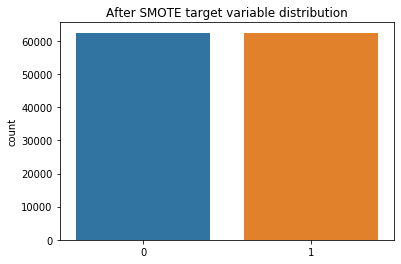

In [88]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_res,y_res,train_size=.7,random_state=1)
display(fun_model(models,x_train1,x_test1,y_train1,y_test1))

sns.countplot(y_res).set_title('After SMOTE target variable distribution')
plt.savefig('After SMOTE target variable distribution.png')

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:##f08513;">vii) Other Models

In [91]:
def fun_build_model(md,x_train, x_test, y_train, y_test):
    for j in md:
        j.fit(x_train,y_train)
        y_pred = j.predict(x_test)
        print('Classification report of the model ',j)
        display(classification_report(y_test,pred)
                
print('Classification report of LogisticRegression\n')
print(fun_build_model(x_train, x_test, y_train, y_test,LogisticRegression()))
print('='*100)

print('Classification report of DecisionTree\n')
print(fun_build_model(x_train, x_test, y_train, y_test,DecisionTreeClassifier()))
print('='*100)

print('Classification report of RandomForestClassifier\n')
print(fun_build_model(x_train, x_test, y_train, y_test,RandomForestClassifier()))

SyntaxError: invalid syntax (<ipython-input-91-730f2b7ff1ad>, line 9)

In [92]:
models = [] 
models.append(('Logistic Regression', LogisticRegression(random_state=1)))  
models.append(('Logistic Regression Balanced', LogisticRegression(random_state=1,class_weight='balanced')))  
models.append(('DecisonTree Entropy', DecisionTreeClassifier(criterion='entropy',random_state=1,class_weight='balanced')))
models.append(('DecisonTree Gini', DecisionTreeClassifier(criterion='gini',random_state=1,class_weight='balanced')))
models.append(('Random Forest Entropy',RandomForestClassifier(criterion='entropy',random_state=1,class_weight='balanced')))
models.append(('Random Forest Gini',RandomForestClassifier(criterion='gini',random_state=1,class_weight='balanced')))

# Output of the dataset without Tranformation

In [93]:
# Original dataset without SMOTE
model_output1 = fun_model(models,x_train, x_test, y_train, y_test)
display(model_output1)

,Model Name,Accuracy on Train set,Accuracy on Test set,f1_score,Cohen Kappa Score
0,Logistic Regression,0.910715,0.906828,0.011329,0.009331
1,Logistic Regression Balanced,0.659810,0.656185,0.221685,0.087452
2,DecisonTree Entropy,1.000000,0.829524,0.122408,0.028170
3,DecisonTree Gini,1.000000,0.830543,0.134358,0.040672
4,Random Forest Entropy,0.981760,0.906343,0.014300,0.010815
5,Random Forest Gini,0.981552,0.906634,0.010288,0.008100


# Output after performing the sqrt transformation

In [95]:
# Original dataset with sqrt transformation
%%time
model_output1 = fun_model(models,x_train_sqrt,x_test_sqrt,y_train_sqrt,y_test_sqrt)
display(model_output1)

UsageError: Line magic function `%%time` not found.


# Output After selecting the best 20 features using SelectKBest

In [96]:
#BEST 20 FEATURES AND COLUMNS
%%time
model_output1 = fun_model(models,x_train_new,x_test_new,y_train_new,y_test_new)
display(model_output1)

UsageError: Line magic function `%%time` not found.


# Output After selecting the best 10 features using SelectKBest

In [ ]:
%%time
best = list(best_feature[0].head(10))
x4 = x[best]
y4 = y.copy()
x_train_10,x_test_10,y_train_10,y_test_10 = train_test_split(x4,y4,train_size=.7,random_state=1)
model_output1 = fun_model(models,x_train_10,x_test_10,y_train_10,y_test_10)
display(model_output1)

In [ ]:
print('Features selected using SelectKBest are ',len(x_train_10.columns))
print('='*80,'\n Selected features are as belows:')
print(x_train_10.columns)

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#51ab1a;"> Balancing the target variable using SMOTE 

In [ ]:
%%time
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)
X_res = pd.DataFrame(X_res,columns=x.columns)
sns.countplot(y_res).set_title('After SMOTE target variable distribution')
plt.savefig('After SMOTE target variable distribution.png')
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_res,y_res,train_size=.7,random_state=1)

In [ ]:
%%time
model_outputs2 = fun_model(models,x_train1,x_test1,y_train1,y_test1)
display(model_outputs2)

#  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#51ab1a;">Select Kbest featues on the Balanced dataset 

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
skb = SelectKBest(chi2).fit(X_res,y_res)
best_feature = pd.DataFrame((X_res.columns,skb.scores_)).T.sort_values(by=1,ascending=False)
best = list(best_feature[0].head(20))

In [ ]:
print('Top 20 features')
x4 = X_res[best]
y4 = y_res.copy()
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x4,y4,train_size=.7,random_state=1)
model_outputs2 = fun_model(models,x_train_new,x_test_new,y_train_new,y_test_new)
display(model_outputs2)

In [ ]:
top = 80
print('Top {} features'.format(top))
best = list(best_feature[0].head(top))
x4 = X_res[best]
y4 = y_res.copy()
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(x4,y4,train_size=.7,random_state=1)
model_outputs2 = fun_model(models,x_train_new,x_test_new,y_train_new,y_test_new)
display(model_outputs2)

In [ ]:
#tanforming numerica featues only with np.sqrt
for i in numeric_var:
    X_res[i] = np.sqrt(X_res[i])

x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(X_res,y_res,train_size=.7,random_state=1)
model_outputs2 = fun_model(models,x_train_new,x_test_new,y_train_new,y_test_new)
display(model_outputs2)

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#e61236;"> Inference

#  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#de6114;"> viii) Choosing the Best Model based on the KFold Result.

In [ ]:
%%time
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

pred_test_full =0; cv_score =[]; f1score = []; cohenscore = []; model_name = []; i=1; train_sc = []

X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)

for train_index,test_index in kf.split(X_res,y_res):
    xtrain,xvalidation = X_res.loc[train_index],X_res.loc[test_index]
    ytrain,yvalidation = y_res.loc[train_index],y_res.loc[test_index]
    
    #model
    lr = LogisticRegression(random_state=1)
    lr.fit(xtrain,ytrain)
    model_name.append('Logistic Regression')
    train_sc.append(lr.score(xtrain,ytrain))
    cv_score.append(accuracy_score(yvalidation,lr.predict(xvalidation)))    
    f1score.append(f1_score(yvalidation,lr.predict(xvalidation)))
    cohenscore.append(cohen_kappa_score(yvalidation,lr.predict(xvalidation)))
                    
    lr = DecisionTreeClassifier(random_state=1)
    lr.fit(xtrain,ytrain)
    model_name.append('DecisionTreeClassifier')
    train_sc.append(lr.score(xtrain,ytrain))
    cv_score.append(accuracy_score(yvalidation,lr.predict(xvalidation)))    
    f1score.append(f1_score(yvalidation,lr.predict(xvalidation)))
    cohenscore.append(cohen_kappa_score(yvalidation,lr.predict(xvalidation)))
    
    lr = RandomForestClassifier(random_state=1)
    lr.fit(xtrain,ytrain)
    model_name.append('Random Forest')
    train_sc.append(lr.score(xtrain,ytrain))
    cv_score.append(accuracy_score(yvalidation,lr.predict(xvalidation)))    
    f1score.append(f1_score(yvalidation,lr.predict(xvalidation)))
    cohenscore.append(cohen_kappa_score(yvalidation,lr.predict(xvalidation)))
    
    print('{} of KFold {}'.format(i,kf.n_splits))
    i+=1

In [ ]:
best_model_selection =  pd.DataFrame({'Model':model_name,'Train_Score':train_sc,'Score':cv_score,'F1_score':f1score,'cohen_kappa_score':cohenscore})
plt.figure(figsize=(10,9))
plt.ylim(.875, .97)
sns.boxplot(best_model_selection['Model'],best_model_selection['Score']).set_title('Accuracy on test set without tuning model')
plt.savefig('Accuracy on test set without tuning model.png')
plt.show()

#  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#de6114;"> ix) Grid Search CV Best Parameter - 

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">  1) Grid Search CV Best Parameter - Logistic Regression

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;"> 2) Decision Tree Grid Search CV

# <span style="font-family: Arial; font-weight:bold;font-size:.7em;color:##ed1515;">  Random Forest Best parameter 

In [ ]:
%%time
models = [ ]
models.append(['Logistic Regression',LogisticRegression(random_state=1)])
models.append(['Logistic Regression Hyperparameter',LogisticRegression(random_state=1,C=20)])

models.append(['Decision Tree',DecisionTreeClassifier(random_state=1)])
models.append(['Decision Tree Hyperparameter',DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= 18)])

models.append(['RandomForest',RandomForestClassifier(random_state=1)])
models.append(['RandomForest Hyperparameter',RandomForestClassifier(bootstrap= False, max_depth= 50, max_features= 10, n_estimators= 25)])

model_outputs2 = fun_model(models,x_train1, x_test1, y_train1, y_test1)
display(model_outputs2)

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#de6114;"> x) Using the best parameters and KFOLD for selecting the best model 

In [ ]:
%%time
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

pred_test_full =0; cv_score =[]; f1score = []; cohenscore = []; model_name = []; i=1; train_sc = []

X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)

for train_index,test_index in kf.split(X_res,y_res):
    xtrain,xvalidation = X_res.loc[train_index],X_res.loc[test_index]
    ytrain,yvalidation = y_res.loc[train_index],y_res.loc[test_index]
    
    #model
    lr = LogisticRegression(random_state=1, C=20)
    lr.fit(xtrain,ytrain)
    model_name.append('Logistic Regression')
    train_sc.append(lr.score(xtrain,ytrain))
    cv_score.append(accuracy_score(yvalidation,lr.predict(xvalidation)))    
    f1score.append(f1_score(yvalidation,lr.predict(xvalidation)))
    cohenscore.append(cohen_kappa_score(yvalidation,lr.predict(xvalidation)))
                    
    lr = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= 18)
    lr.fit(xtrain,ytrain)
    model_name.append('DecisionTreeClassifier')
    train_sc.append(lr.score(xtrain,ytrain))
    cv_score.append(accuracy_score(yvalidation,lr.predict(xvalidation)))    
    f1score.append(f1_score(yvalidation,lr.predict(xvalidation)))
    cohenscore.append(cohen_kappa_score(yvalidation,lr.predict(xvalidation)))
    
    lr = RandomForestClassifier(random_state=1,bootstrap= False, max_depth= 50, max_features= 10, n_estimators= 25)
    lr.fit(xtrain,ytrain)
    model_name.append('Random Forest')
    train_sc.append(lr.score(xtrain,ytrain))
    cv_score.append(accuracy_score(yvalidation,lr.predict(xvalidation)))    
    f1score.append(f1_score(yvalidation,lr.predict(xvalidation)))
    cohenscore.append(cohen_kappa_score(yvalidation,lr.predict(xvalidation)))
    
    print('{} of KFold {}'.format(i,kf.n_splits))
    i+=1

In [ ]:
best_model_selection =  pd.DataFrame({'Model':model_name,'Score':cv_score,'F1_score':f1score,'cohen_kappa_score':cohenscore})
plt.figure(figsize=(10,9))
plt.ylim(.90, .96)
sns.boxplot(best_model_selection['Model'],best_model_selection['Score']).set_title('Accuracy on test set after tuning model')
plt.savefig('Accuracy on test set after tuning model.png')
plt.show()

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#de6114;"> xi) Logistic Regression Bootstrap Confidence Interval # Write The theory 

In [ ]:
%%time
ac_score = []
for i in range(100):
    x_train10,x_test10,y_train10,y_test10 = train_test_split(X_res,y_res,random_state=i,train_size=.50)
    lr = LogisticRegression(random_state=1,C=20)
    predict = lr.fit(x_train10,y_train10).predict(x_test10)
    ac_score.append(accuracy_score(y_test10,predict))

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(ac_score)
plt.title('Accuracy score histogram for 100 iterations')
plt.savefig('Accuracy score histogram for 100 iterations')
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(ac_score, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(ac_score, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#51ab1a;"> Best feature selected from the Random Forest

In [ ]:
%%time
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_res,y_res,train_size=.7,random_state=1)
rf = RandomForestClassifier(random_state=1,bootstrap= False, max_depth= 50, max_features= 10, n_estimators= 25)
rf.fit(x_train1,y_train1)
print('Train Score:{}, Test Score: {}'.format(rf.score(x_train1,y_train1),rf.score(x_test1,y_test1)))

abc = pd.DataFrame({'feature_importances_':rf.feature_importances_,'Columns Name':x_train1.columns})

feat = []; train_s = []; test_s = []; f1 = []; cohen= []

for i in range(10,105,5):
    colsname = list(abc.sort_values('feature_importances_',ascending=False)['Columns Name'].head(i))
    #print('\nBest Features selected from the random forest are ',i)
    X_res_up_new = X_res[colsname]
    y_res_up_new = y_res.copy()
    x_train2,x_test2,y_train2,y_test2 = train_test_split(X_res_up_new,y_res_up_new,train_size=.7,random_state=1)
    rf = RandomForestClassifier(random_state=1,bootstrap= False, max_depth= 50, max_features= 10, n_estimators= 25)
    rf.fit(x_train2,y_train2)
    feat.append(i)
    train_s.append(rf.score(x_train2,y_train2))
    test_s.append(rf.score(x_test2,y_test2))
    y_pred = rf.predict(x_test2)
    f1.append(f1_score(y_test2,y_pred))
    cohen.append(cohen_kappa_score(y_test2,y_pred))
    
forest_outputs  = pd.DataFrame({'Feature':feat,'Train_score':train_s,'Test_Score':test_s, 
                               'F1 Score':f1, 'cohen_kapp_score':cohen
                               })
display(forest_outputs)

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#51ab1a;">Best feature selected from the Decision Tree

In [ ]:
%%time

x_train1,x_test1,y_train1,y_test1 = train_test_split(X_res,y_res,train_size=.7,random_state=1)
rf = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= 18)
rf.fit(x_train1,y_train1)
print('Train Score:{}, Test Score: {}'.format(rf.score(x_train1,y_train1),rf.score(x_test1,y_test1)))

xyz = pd.DataFrame({'feature_importances_':rf.feature_importances_,'Columns Name':x_train1.columns})

feat = []; train_s = []; test_s = []; f1 = []; cohen= []

for i in range(10,105,5):
    colsname = list(xyz.sort_values('feature_importances_',ascending=False)['Columns Name'].head(i))
    #print('\nBest Features selected from the random forest are ',i)
    X_res_up_new = X_res[colsname]
    y_res_up_new = y_res.copy()
    x_train2,x_test2,y_train2,y_test2 = train_test_split(X_res_up_new,y_res_up_new,train_size=.7,random_state=1)
    rf = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= 18)
    rf.fit(x_train2,y_train2)
    feat.append(i)
    train_s.append(rf.score(x_train2,y_train2))
    test_s.append(rf.score(x_test2,y_test2))
    y_pred = rf.predict(x_test2)
    f1.append(f1_score(y_test2,y_pred))
    cohen.append(cohen_kappa_score(y_test2,y_pred))

tree_outputs= pd.DataFrame({'Feature':feat,'Train_score':train_s,'Test_Score':test_s, 
                               'F1 Score':f1, 'cohen_kapp_score':cohen
                               })
display(tree_outputs)

In [ ]:
%%time
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

pred_test_full =0; cv_score =[]; f1score = []; cohenscore = []; model_name = []; i=1; train_sc = []

X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)

forest100 = list(abc.sort_values('feature_importances_',ascending=False)['Columns Name'].head(60))
tree100 = list(xyz.sort_values('feature_importances_',ascending=False)['Columns Name'].head(50))

for train_index,test_index in kf.split(X_res,y_res):
    
    xtrain,xvalidation = X_res.loc[train_index],X_res.loc[test_index]
    ytrain,yvalidation = y_res.loc[train_index],y_res.loc[test_index]
    
    #model
    lr = LogisticRegression(random_state=1, C=20)
    lr.fit(xtrain,ytrain)
    model_name.append('Logistic Regression')
    train_sc.append(lr.score(xtrain,ytrain))
    cv_score.append(accuracy_score(yvalidation,lr.predict(xvalidation)))    
    f1score.append(f1_score(yvalidation,lr.predict(xvalidation)))
    cohenscore.append(cohen_kappa_score(yvalidation,lr.predict(xvalidation)))
           
    xtrain_tree = xtrain[tree100]
    xvalidation_tree = xvalidation[tree100]
    
    lr = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= 18)
    lr.fit(xtrain_tree,ytrain)
    model_name.append('DecisionTreeClassifier')
    train_sc.append(lr.score(xtrain_tree,ytrain))
    cv_score.append(accuracy_score(yvalidation,lr.predict(xvalidation_tree)))    
    f1score.append(f1_score(yvalidation,lr.predict(xvalidation_tree)))
    cohenscore.append(cohen_kappa_score(yvalidation,lr.predict(xvalidation_tree)))
    
    
    xtrain_rf = xtrain[forest100]
    xvalidation_rf = xvalidation[forest100]
     
    lr = RandomForestClassifier(random_state=1,bootstrap= False, max_depth= 50, max_features= 10, n_estimators= 25)
    lr.fit(xtrain_rf,ytrain)
    model_name.append('Random Forest')
    train_sc.append(lr.score(xtrain_rf,ytrain))
    cv_score.append(accuracy_score(yvalidation,lr.predict(xvalidation_rf)))    
    f1score.append(f1_score(yvalidation,lr.predict(xvalidation_rf)))
    cohenscore.append(cohen_kappa_score(yvalidation,lr.predict(xvalidation_rf)))
    
    print('{} of KFold {}'.format(i,kf.n_splits))
    i+=1

In [ ]:
best_model_selection =  pd.DataFrame({'Model':model_name,'Score':cv_score,'F1_score':f1score,'cohen_kappa_score':cohenscore})
plt.figure(figsize=(10,9))
plt.ylim(.90, .96)
sns.boxplot(best_model_selection['Model'],best_model_selection['Score']).set_title('Accuracy on test set after tuning model & selective features')
plt.savefig('Accuracy on test set after tuning model & selective features.png')
plt.show()

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#e61236;">Inference: 

In [ ]:
df.head()